In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

/Users/jonathanbouchet/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def clean(data):
    data["Age"]      = data["Age"].fillna(data["Age"].mean())
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    return data

In [3]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("./train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("./test.csv", dtype={"Age": np.float64}, )

In [4]:
train_clean = clean(titanic_df)

In [5]:
test_clean = clean(test_df)

In [6]:
predictors = ["Pclass", "Sex", "Age","Embarked"]

In [7]:
rfc = RandomForestClassifier(n_estimators=100)

In [8]:
xtrain = train_clean[predictors]

In [9]:
ytrain = train_clean['Survived']

In [10]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rfc.score(xtrain,ytrain)

0.90123456790123457

In [15]:
ytest = test_clean[predictors]

In [16]:
predicted = rfc.predict(ytest)

In [17]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predicted
    })

In [18]:
#submission.to_csv("result3.csv", index=False)

In [21]:
from sklearn.cross_validation import cross_val_score

In [24]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
RF = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(RF, xtrain, ytrain, cv=10, scoring='accuracy')
print scores
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 0.68888889  0.82222222  0.78651685  0.82022472  0.82022472  0.78651685
  0.84269663  0.79775281  0.82022472  0.84090909]
0.802617750539


In [25]:
from sklearn.grid_search import GridSearchCV

In [35]:
# define the parameter values that should be searched
n_range = range(10, 100)
print n_range

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [36]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_range)
print param_grid

{'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [37]:
RF = RandomForestClassifier(n_estimators=50)

In [38]:
# instantiate the grid
grid = GridSearchCV(RF, param_grid, cv=10, scoring='accuracy')

In [39]:
# fit the grid with data
grid.fit(xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [40]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

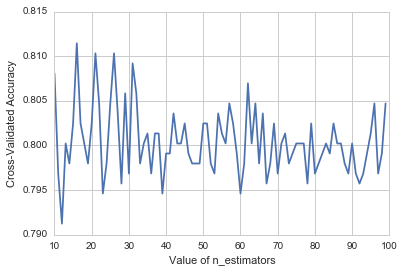

In [41]:
# plot the results
plt.plot(n_range, grid_mean_scores)
plt.xlabel('Value of n_estimators')
plt.ylabel('Cross-Validated Accuracy')